![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Regressão periódica

## Dados

Nesta primeira parte iremos ajustar uma curva aos dados de demanda elétrica fornecidos pelo ONS,
para o período entre os dias *16.04.2018 - 16.05.2018*.

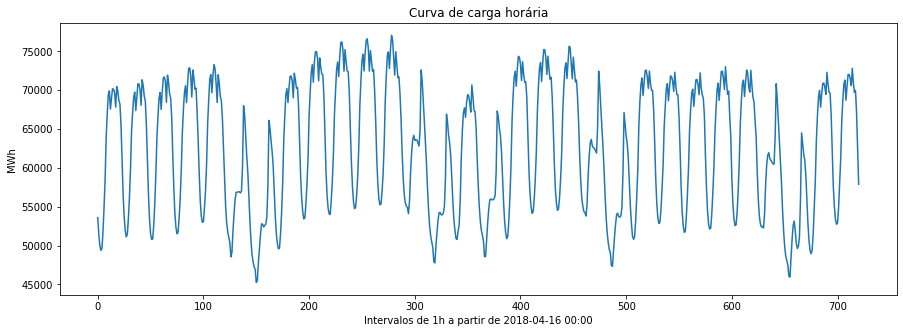

In [4]:
cch = np.load('Demanda_16.04.2018-16.05.2018.npz')
ys = cch['Demanda']
ts = np.arange(len(ys))

plt.figure(figsize=(15,5))
plt.plot(ts,ys)
plt.title("Curva de carga horária")
plt.ylabel("MWh")
plt.xlabel("Intervalos de 1h a partir de 2018-04-16 00:00");

Vamos pegar um intervalo com dias úteis.

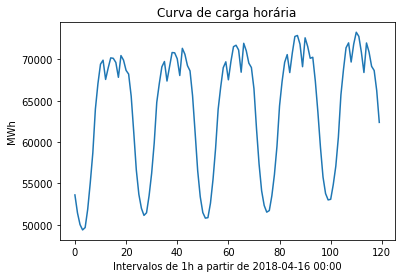

In [5]:
tmax = 120

plt.plot(ts[:tmax],ys[:tmax])
plt.title("Curva de carga horária")
plt.ylabel("MWh")
plt.xlabel("Intervalos de 1h a partir de 2018-04-16 00:00");

# Parte 1: Ajuste simples

## Questão 1: Matriz da regressão

O que salta aos olhos é o comportamento aproximadamente periódico,
logo uma primeira idéia é ajustar um modelo com funções também periódicas.

Um ajuste simples é o seguinte:
$$y(t) = c_0 + c_1\sin\left(\frac{2\pi t}{24}\right) + c_2\cos\left(\frac{2\pi t}{24}\right)$$

Explique porque o denominador 24 faz sentido para estes dados que temos.

Estamos analisando os dados referentes a demanda elétrica com intervalos de uma hora. É possivel perceber que o gráfico tem características periódicas, com comportamento que se assemelha em intervalos de $24$ horas em $24$ horas.

Na análise de funções periódicas, o período $T$ dessas funções , é igual a $\frac{1}{f}$, sendo a frequência $f$ nas funções seno e cosseno acima igual ao coeficiente que acompanha o argumento $2 \pi t$, logo, nossa frequência é igual a $f=\frac{1}{24}$, e portanto nosso periodo é:

$ T = \frac{1}{ \frac{1}{24} } = 24$ horas. 

Portanto, o denominador igual a $24$ faz sentido dentro da amostra de dados que temos, já que é provavel que a demanda elétrica siga um comportamento que se assemelha a cada dia. 

Ainda é possivel perceber, ao analisar o gráfico que compreende mais que $5$ dias uteis na semana, que durante os feriados, o comportamento é diferente, e possui picos locais de uma maneira distinta. O comportamento semanal também parece se repetir, embora durante os dias uteis a demanda se assemelhe mais.











Escreva a função `make_trig_matrix(ts,p)`, que monta a matriz de regressão $X$ tal que $Xc = y$ para o modelo proposto acima para `ts` e com período `p`.

**Observações:**
- A função constante está na base;
- A ordem das colunas importa para os asserts (mas não para o ajuste, se você sabe o que faz).
  Assim, as colunas devem vir na ordem das funções: constante, seno, cosseno.

In [6]:
def make_trig_matrix(ts,p):
    """ Retorna a matriz de regressão para o modelo y(t) = c0 + c1*sin(2*pi*t/p) + c2*cos(2*pi*t/p). """
    X = np.array([[1, np.sin((2*np.pi*t)/p), np.cos((2*np.pi*t)/p)] for t in ts])
    return X

In [7]:
tss = np.linspace(-2*np.pi,2*np.pi,51)
X = make_trig_matrix(tss,np.pi)

assert all([np.isclose(X[i][0],1) for i in range(10)])

In [8]:
# Testes de periodicidade

assert np.allclose(X[0][1],X[-1][1])
assert np.allclose(X[0][1],X[len(tss)//2][1])
assert np.allclose(X[0][2],X[-1][2])
assert np.allclose(X[0][2],X[len(tss)//2][2])

## Questão 2: Gráficos

Faça o gráfico tanto dos dados como do ajuste do modelo,
usando apenas as 120 primeiras observações, que correspondem aos primeiros cinco dias úteis.

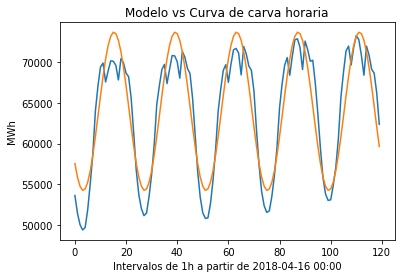

In [9]:
tmax = 120
t = ts[:tmax]
X = make_trig_matrix(t, 24) 
y = ys[:tmax]
coefs, *_ = np.linalg.lstsq(X, y, rcond=None)
y_model = X@coefs

ax = plt.gca()
ax.plot(t,y, label="real function")
ax.plot(t,y_model, label="model")
plt.title("Modelo vs Curva de carva horaria")
plt.ylabel("MWh")
plt.xlabel("Intervalos de 1h a partir de 2018-04-16 00:00");
plt.show()

In [10]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

yss = [ax.lines[i].get_ydata() for i in range(2)]

assert 73000 <= np.max(yss) <= 73800
assert 49000 <= np.min(yss) <= 50000

In [11]:
ax = None

Plote também o residual (erro de ajuste)!

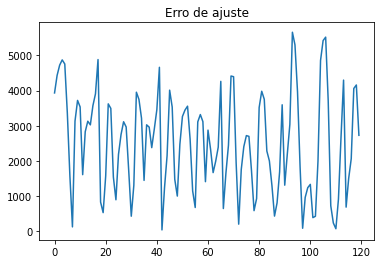

In [12]:
ax = plt.gca()

ax.plot(t,abs(y- y_model), label="model")
plt.title("Erro de ajuste")

plt.show()

In [13]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1


In [14]:
ax = None

Esse gráfico reflete alguma tendência nos dados que difere do ajuste?
Se sim qual função poderia ser acrescentada a base do modelo para tentar capturar essa tendência?

Como dito anteriormente, o gráfico tem um comportamento similar durante os dias da semana, sendo possível perceber que tanto os picos como os vales da distribuição tendem a aumentar durante a semana, possuindo valores menores para pico e vale nas segundas feiras que crescem até as sextas feiras. 

Desse modo, poderiamos adicionar uma função linear $f(x) = \alpha x $ com inclinação $\alpha $ para representar esse acréscimo na demanda ao longo da semana. Contudo, o comportamento durante os fins de semana distoam do comportamento dos dias úteis, portanto, para intervalos que compreendem mais semanas, pode ser mais interessante ajustar um polinômio na base do modelo. 

O que mais você percebe no gráfico de erros?

Os maiores erros de ajuste se concentram nos vales da distribuição, mas esse erro vai diminuindo conforme a semana passa, pois como dito anteriormente, a demanda mínima a cada dia tem uma tendência de aumento até sexta feira. Nos picos da função ajustada, também apresenta um erro maior que varia de acordo com os picos e vales locais do topo da distribuição. 

## Questão 3: Uma base maior

Agora, vamos tentar um ajuste com mais funções (também ditas _harmônicos_):
$$y(t) = \alpha_0 +  \sum_{i=1}^k\alpha_i \sin\left(\frac{2\pi it}{24}\right) + \sum_{i=1}^k\beta_i \cos\left(\frac{2\pi it}{24}\right).$$

Para te auxiliar nessa tarefa escreva a função
- `make_full_trig_matrix(ts,p,i_max)`: Semelhante a `make_trig_matrix`, mas retorna a matriz para o ajuste acima,
  correspondente ao conjunto de harmônicos de $i=1$ até $i = i_\max$.

In [15]:
def make_full_trig_matrix(ts,p,i_max):
  X = []
  for t in ts:
    aux = np.array([1])
    alfa = np.array([ np.sin((np.pi * 2 * i * t)/p) for i in range(1, i_max+1)])
    beta = np.array([ np.cos((np.pi * 2 * i * t)/p) for i in range(1, i_max+1)])
    
    aux = np.append(aux, alfa, axis=0)
    aux = np.append(aux, beta, axis=0)
    X.append(aux)
  return X

In [16]:
# Teste de sanidade
tss = np.arange(0,100)

X = make_full_trig_matrix(tss, 24, 1)
Y = make_trig_matrix(tss, 24)

for i in range(5):
    for j in range(3):
        assert np.isclose(X[i][j],Y[i][j])

In [17]:
# Teste de dimensão
tss = np.arange(0,100)

X = make_full_trig_matrix(tss, 24, 3)
assert np.shape(X) == (100,7)

## Questão 4: Gráficos de novo

Faça o gráfico do ajuste para $i_\max = 2$, novamente para os 5 primeiros dias úteis.

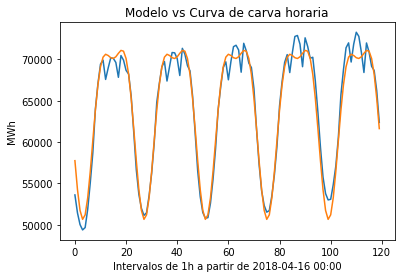

In [18]:
tmax = 120
t = ts[:tmax]
X = make_full_trig_matrix(t, 24, 2)
y = ys[:tmax]
coefs, *_ = np.linalg.lstsq(X, y, rcond=None)
y_model = X@coefs


ax = plt.gca()
ax.plot(t,y, label="real function")
ax.plot(t,y_model, label="model")
plt.title("Modelo vs Curva de carva horaria")
plt.ylabel("MWh")
plt.xlabel("Intervalos de 1h a partir de 2018-04-16 00:00");
plt.show()

In [19]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

for i in range(2):
    yss = ax.lines[i].get_ydata()
    assert 71000 <= np.max(yss) <= 73300
    assert 49000 <= np.min(yss) <= 51300

In [20]:
ax = None

E não se esqueça do residual.

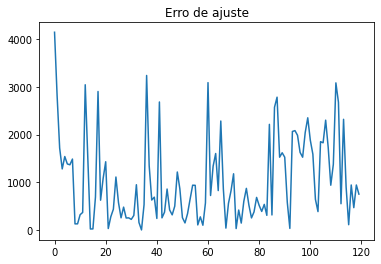

In [21]:
ax = plt.gca()

ax.plot(t,abs(y- y_model), label="model")
plt.title("Erro de ajuste")

plt.show()

In [22]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1


In [23]:
ax = None

Agora, faça o gráfico do erro para $i_\max = 5$, $6$ e $10$, lado a lado.

**Dica:** Faça uma função `graph_err(imax, tmax)` que faz o gráfico do erro do ajuste em função de imax e tmax,
e use `subplot(n,m,k)` para selecionar o eixo.

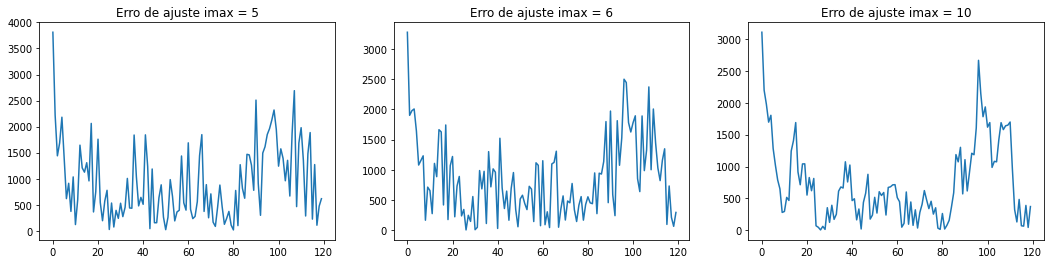

In [24]:
def graph_err(imax, tmax):
  t = ts[:tmax]
  y = ys[:tmax]
  X = make_full_trig_matrix(t, 24, imax)
  coefs, *_ = np.linalg.lstsq(X, y, rcond=None)
  y_model = X@coefs
  return abs(y- y_model)


fig, axs = plt.subplots(ncols=3, figsize=(18,4))

axs[0].plot(t, graph_err(5, 120))
axs[0].set_title("Erro de ajuste imax = 5")

axs[1].plot(t, graph_err(6, 120))
axs[1].set_title("Erro de ajuste imax = 6")


axs[2].plot(t, graph_err(10, 120))
axs[2].set_title("Erro de ajuste imax = 10")

plt.show()

O que você muda e o que não muda ao aumentar $i_\max$?

Ao aumentar o valor de $i_{max}$ os erros diminuem em alguns pontos, contudo ainda é possivel perceber um comportamento oscilatório de acordo com os vales e picos. Nas primeiras horas o erro é consideravelmente grande, em todos os casos, mas tende a diminuir.

Considerando valores maiores de $i_{max}$, principalmente no caso em que é igual a $10$, os erros são menores e apresentam menos oscilações, o que demonstra que o modelo está mais adequado a demanda, embora em poucos pontos, ainda apresente um erro maior.

# Parte 2: Ajuste misto

## Questão 5: Polinômios e funções trigonométricas

Vamos adicionar polinômios à base, e comparar o erro de regressão obtido com uma base um pouco maior.

Comece implementando a função `make_poly_matrix(ts, d_max)`,
que retorna a matriz de ajuste polinomial de grau até $d_\max$.

Para não duplicar a coluna de 1's na matriz do modelo completo,
a função `make_poly_matrix` não retorna a coluna correspondente às funções constantes,
mas apenas aos polinômios $X$, $X^2$, ..., $X^{d_\max}$.

In [25]:
def make_poly_matrix(ts, dmax):
    assert dmax >= 1
    X = []
    for t in ts:
      X.append([t**d for d in range(1, dmax + 1)])

    return X

In [26]:
tss = np.arange(1,5)

X = make_poly_matrix(tss,3)

assert np.allclose(X[0],[1,1,1])
assert np.allclose(X[1],[2,4,8])
assert np.allclose(X[2],[3,9,27])
assert np.allclose(X[3],[4,16,64])

Agora, faça uma função que retorna a matriz do ajuste misto

In [27]:
def make_trig_poly(ts, p, imax, dmax):
    if dmax == 0:
        return make_full_trig_matrix(ts, p, imax)
    else:
        Xftm = make_full_trig_matrix(ts, p, imax)
        Xpm = make_poly_matrix(ts, dmax)
        X = []
        for i in range(0, len(Xftm)):
          aux = np.concatenate((Xftm[i], Xpm[i]), axis=0)
          X.append(aux)
        return np.array(X)

## Questão 6: Mais gráficos ainda

Trace, num mesmo eixo, os erros correspondentes aos seguintes ajustes:
- Trigonométrico original, com apenas 1 harmônico
- Trigonométrico com 6 harmônicos
- Misto com 1 harmônico e um polinômio de grau 1
- Misto com 6 harmônicos e polinômio de grau 1
- Misto com 1 harmônico e polinômios de grau até 5
- Misto com 6 harmônicos e polinômios de grau até 5

In [28]:
def graph_err(ts, ys, p, imax, dmax):
    """Função auxiliar para gráfico de erros"""
    t = ts[:tmax]
    y = ys[:tmax]
    X = make_trig_poly(t, p, imax, dmax)
    coefs, *_ = np.linalg.lstsq(X, y, rcond=None)
    y_model = X@coefs
    return abs(y- y_model)


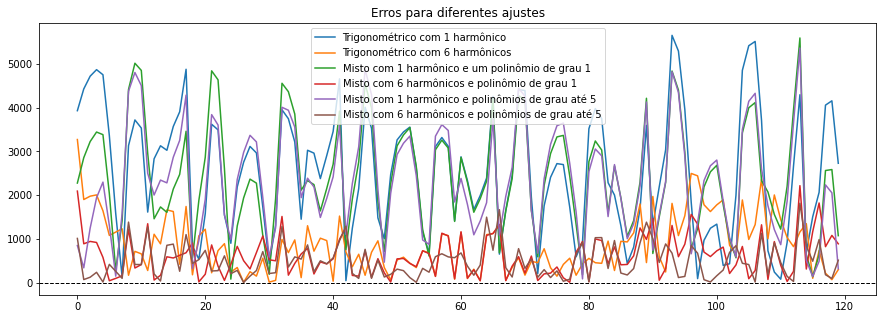

In [29]:
plt.figure(figsize=(15,5))

subts = ts[:120]
subys = ys[:120]

plt.plot(subts, graph_err(subts, subys, 24, 1, 0), label="Trigonométrico com 1 harmônico")
plt.plot(subts, graph_err(subts, subys, 24, 6, 0), label="Trigonométrico com 6 harmônicos")
plt.plot(subts, graph_err(subts, subys, 24, 1, 1), label="Misto com 1 harmônico e um polinômio de grau 1")
plt.plot(subts, graph_err(subts, subys, 24, 6, 1), label="Misto com 6 harmônicos e polinômio de grau 1")
plt.plot(subts, graph_err(subts, subys, 24, 1, 5), label="Misto com 1 harmônico e polinômios de grau até 5")
plt.plot(subts, graph_err(subts, subys, 24, 6, 5), label="Misto com 6 harmônicos e polinômios de grau até 5")
plt.legend()
plt.title("Erros para diferentes ajustes")
plt.axhline(color='black', linestyle='--', linewidth=1)
ax = plt.gca()
plt.show()

In [30]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 7
assert len(ax.legend().texts) == 6

O que você observou? Que melhora é obtida com o acréscimo dos polinômios da base?

O acréscimo de harmônicos no geral trouxe erros em uma magnitude menor, considerando as diferentes distribuições de erro plotadas, embora o comportamento do erro ainda esteja com muitos ruidos de acordo com os picos de vales. Contudo, o acréscimo dos polinômios parece ter modificado a tendência dos erros, o que pode ser verificado ao comparar o ajuste misto com 1 harmônico e um polinômio de grau 1, com o ajuste misto com 1 harmônico e polinômios de grau até 5.

Faça agora dois gráficos de erro, para separar em dois grupos.

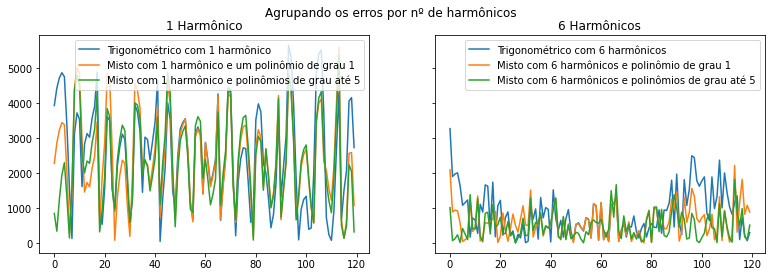

In [31]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

subts = ts[:120]
subys = ys[:120]

axs[1].plot(subts, graph_err(subts, subys, 24, 6, 0), label="Trigonométrico com 6 harmônicos")
axs[1].plot(subts, graph_err(subts, subys, 24, 6, 1), label="Misto com 6 harmônicos e polinômio de grau 1")
axs[1].plot(subts, graph_err(subts, subys, 24, 6, 5), label="Misto com 6 harmônicos e polinômios de grau até 5")
axs[1].legend()
axs[1].set_title("6 Harmônicos")

axs[0].plot(subts, graph_err(subts, subys, 24, 1, 0), label="Trigonométrico com 1 harmônico")
axs[0].plot(subts, graph_err(subts, subys, 24, 1, 1), label="Misto com 1 harmônico e um polinômio de grau 1")
axs[0].plot(subts, graph_err(subts, subys, 24, 1, 5), label="Misto com 1 harmônico e polinômios de grau até 5")
axs[0].legend()
axs[0].set_title("1 Harmônico")

fig.suptitle('Agrupando os erros por nº de harmônicos')
ax = plt.gca()
plt.show()

- Quais são os grupos que você escolheu?
- Porquê?

Como dito anteriormente, a redução dos erros de ajuste foi perceptível nos casos com maior número de harmônicos, sendo assim, foi escolhido separar o conjunto de erros para ajustes com $1$ harmônico e com $6$ harmônicos. Ao analisar os graficos, fica evidente essa diferença. 

Ao separar por grupos, é possivel perceber que a inclusão de polinônios de grau até $5$ torna os erros no inicio da semana e em alguns outros pontos menores em comparação aos outros casos. Contudo, essa diferença é pouca e ainda existem muitos ruidos e variações na distribuição tornando essa análise complicada. 

No geral, o que realmente apresentou um impacto significatico, foi a inclusão de harmônicos no ajuste, o que pode ser visto pela diferença entre os gráficos.